In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Deschiderea fisierului .data
with open('house-votes-84.data', 'r') as f:
    # Citesc datele din fisier
    data = f.readlines()

# Impart datele dupa separatorul ',' si sterg prima coloana
data = [x.strip().split(',')[1:] for x in data]

# Creez un vector de label-uri pentru a identifica reprezentantii republicani sau democrat

labels = []
with open("house-votes-84.data", "r") as f:
    for line in f:
        labels.append(1 if line.split(',')[0] == 'republican' else -1)


In [36]:
# Creez matrice, de aceeasi lungime cu vectorul data
A = np.zeros((len(data), len(data[0])))

for i in range(len(data)):
    for j in range(len(data[0])):
        # Verific valoarea fiecărei pozitii si o schimb in 1, 0, or -1, in functie de valoare
        if data[i][j] == 'y':
            A[i][j] = 1
        elif data[i][j] == '?':
            A[i][j] = 0
        elif data[i][j] == 'n':
            A[i][j] = -1

In [37]:
def SVD(A):
    m, n = A.shape
    U, S, V = np.zeros((m,m)), np.zeros((m,n)), np.zeros((n,n))
    ATA = np.dot(A.T, A)
    eigenvalues, eigenvectors = np.linalg.eig(ATA)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    for i in range(min(m,n)):
        S[i,i] = np.sqrt(eigenvalues[i])
        U[:,i] = np.dot(A, eigenvectors[:,i])/S[i,i]
    V = eigenvectors.T
    return U, S, V


In [38]:
U, s, VT = SVD(A)
U1, s1, VT1 = np.linalg.svd(A)
print(U)
print('--------------------------------------------------')
print(U1)
print('--------------------------------------------------')


[[ 0.06135958 -0.02517892 -0.06096279 ...  0.          0.
   0.        ]
 [ 0.06396898  0.00780588 -0.00281649 ...  0.          0.
   0.        ]
 [ 0.03311324  0.07269761 -0.07216542 ...  0.          0.
   0.        ]
 ...
 [ 0.05880491  0.01419887 -0.03095667 ...  0.          0.
   0.        ]
 [ 0.04351815 -0.08102951  0.00850906 ...  0.          0.
   0.        ]
 [ 0.06191945 -0.01101447 -0.00653516 ...  0.          0.
   0.        ]]
--------------------------------------------------
[[-0.06135958 -0.02517892  0.06096279 ... -0.04884809 -0.06078535
  -0.05373915]
 [-0.06396898  0.00780588  0.00281649 ...  0.00788187  0.0406621
  -0.06547714]
 [-0.03311324  0.07269761  0.07216542 ...  0.02367022  0.04592477
   0.02523809]
 ...
 [-0.05880491  0.01419887  0.03095667 ...  0.97882004 -0.01104144
   0.00940906]
 [-0.04351815 -0.08102951 -0.00850906 ... -0.00891275  0.97753733
   0.00454417]
 [-0.06191945 -0.01101447  0.00653516 ...  0.00962302  0.00345703
   0.98170416]]
--------------

In [39]:
print(s)
print('--------------------------------------------------')
print(s1)
print('--------------------------------------------------')

[[54.78401461  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         24.49128978  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         21.91768788 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
--------------------------------------------------
[54.78401461 24.49128978 21.91768788 19.95738562 18.58752875 17.22573075
 14.83925996 14.28563716 13.83780123 13.06862931 12.5229185  11.57686358
 11.11191929  9.98312503  9.48424579  7.44926625]
--------------------------------------------------


In [40]:
print(VT)
print('--------------------------------------------------')
print(VT1)

[[-1.89905158e-01  5.20986181e-02 -2.96648089e-01  3.15858442e-01
   3.36209142e-01  2.52374079e-01 -2.94807807e-01 -3.25764806e-01
  -3.03198998e-01  1.24377378e-02 -6.29811547e-02  2.85113086e-01
   2.76876363e-01  2.83075452e-01 -2.42003872e-01 -1.04847382e-01]
 [ 2.45201121e-01  4.43132805e-01 -5.65091473e-02 -3.05309156e-02
   2.15969808e-02 -1.33937604e-01 -2.16421054e-01 -1.17065220e-01
  -1.32966921e-01 -4.64137072e-01  4.79271308e-01 -5.45942544e-02
   2.28811348e-02 -2.31496817e-01  1.08502243e-01 -3.58837365e-01]
 [ 7.40223997e-02 -4.51110936e-01 -3.02736310e-01  2.20012020e-01
  -4.04777759e-02 -4.45875019e-01  1.47724540e-02 -1.03530858e-01
   6.57230982e-02 -2.83343204e-01 -3.60132543e-01  1.97927250e-01
  -1.76317715e-01 -1.23545500e-01  1.37568234e-01 -3.47613595e-01]
 [-9.51794894e-02 -2.23650641e-01 -9.79210424e-02  4.45504924e-02
  -5.65530442e-02 -1.18473266e-01 -8.78795352e-02 -5.36640203e-02
   1.34766581e-02  6.76951337e-01  5.16954356e-01  1.19056365e-01
  -5.59

In [45]:
# Aproximati matricea A cu ordin k

k = 2
S = np.zeros((A.shape[0], A.shape[1]))
S[:k, :k] = np.diag(s[:k])
Ak = U[:, :k] @ S[:k, :k] @ VT[:k, :]

In [46]:
# Calculam primul vector singular din stanga

u1 = U[:, 0]

# Calculam cel de-al doilea vector singular din stanga

u2 = U[:, 1]

# Calculeaza coordonatele politice si bipartizane ale fiecarui reprezentant

partisan_coord = u1
bipartisan_coord = u2


In [47]:
# Creez doua liste pentru coordonatele republicanilor si democratilor
republican_coords = []
democrat_coords = []

# Caut prin fiecare reprezentant si adaug coordonatele in lista corespunzatoare
for i in range(len(labels)):
    if labels[i] == 1:
        republican_coords.append([bipartisan_coord[i], partisan_coord[i]])
    else:
        democrat_coords.append([bipartisan_coord[i], partisan_coord[i]])
        
# Convertesc listele in np.arrays
republican_coords = np.array(republican_coords)
democrat_coords = np.array(democrat_coords)

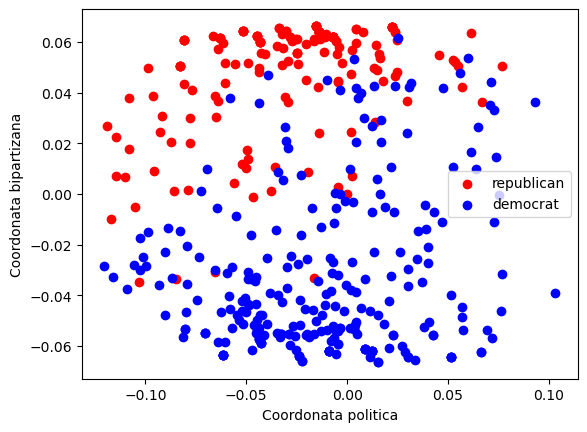

In [48]:
# Desenez plot-ul pentru fiecare partid

plt.scatter(republican_coords[:,0],republican_coords[:,1], color = "r", label = "republican")
plt.scatter(democrat_coords[:,0],democrat_coords[:,1], color = "b", label = "democrat")
plt.legend()
plt.xlabel("Coordonata politica")
plt.ylabel("Coordonata bipartizana")
plt.show()